# Over Current Relay (OC relay)

Pandapower supports running protection scenario using Definite Time Over Current Relay (OC relay) in radial and meshed networks. It supports both the automated time grading plan based on grid searches and manual tripping times. As of now, it does not consider Inverse Time Over Current Relay.

### Example Network

Here is a little example for creating the over current protection scenario. First, we create a network with 7 buses and 8 switches. In this modelling scheme, the relay features are added to the existing switches in the pandapower network. The switch is type defined as 'CB_non_dir' for running protection scenario using over current relay.


In [1]:
def oc_relay_net(open_loop=True):
    import pandapower as pp
    # create an empty network
    net = pp.create_empty_network()  
    
    # busbars and nodes
    bus0 = pp.create_bus(net, name="Bus_extgrid", vn_kv=20, type="b")
    bus1 = pp.create_bus(net, name="Bus_line0", vn_kv=20, type="n")
    bus2 = pp.create_bus(net, name="Bus_line1", vn_kv=20, type="n")
    bus3 = pp.create_bus(net, name="Bus_line2", vn_kv=20, type="n")
    bus4 = pp.create_bus(net, name="Bus_load1", vn_kv=20, type="n")
    bus5 = pp.create_bus(net, name="Bus_line3", vn_kv=20, type="n")
    bus6 = pp.create_bus(net, name="Bus_load2", vn_kv=20, type="n")
    # external grids
    pp.create_ext_grid(net, bus0, vm_pu=1.0, va_degree=0, s_sc_max_mva=100, s_sc_min_mva=50, rx_max=0.1, rx_min=0.1)

    # create lines
    line0 = pp.create_line_from_parameters(net, bus0, bus1, length_km=2, index=0, r_ohm_per_km=0.169,
                                           x_ohm_per_km=0.118438, c_nf_per_km=273, max_i_ka=0.361)
    line1 = pp.create_line_from_parameters(net, bus1, bus2, length_km=5, index=1, r_ohm_per_km=0.169,
                                           x_ohm_per_km=0.118438, c_nf_per_km=273, max_i_ka=0.361)
    line2 = pp.create_line_from_parameters(net, bus2, bus3, length_km=4, index=2, r_ohm_per_km=0.256,
                                           x_ohm_per_km=0.126606, c_nf_per_km=235, max_i_ka=0.286)
    line3 = pp.create_line_from_parameters(net, bus1, bus4, length_km=4, index=3, r_ohm_per_km=0.256,
                                           x_ohm_per_km=0.126606, c_nf_per_km=235, max_i_ka=0.286)
    line4 = pp.create_line_from_parameters(net, bus4, bus5, length_km=0.5, index=4, r_ohm_per_km=0.256,
                                           x_ohm_per_km=0.126606, c_nf_per_km=235, max_i_ka=0.286)
    line5 = pp.create_line_from_parameters(net, bus5, bus6, length_km=0.5, index=5, r_ohm_per_km=0.256,
                                           x_ohm_per_km=0.126606, c_nf_per_km=235, max_i_ka=0.286)
    line6 = pp.create_line_from_parameters(net, bus3, bus6, length_km=4, index=6, r_ohm_per_km=0.256,
                                           x_ohm_per_km=0.126606, c_nf_per_km=235, max_i_ka=0.286)

    # define short-circuit end temperature of the line
    net.line["endtemp_degree"] = 250

    # define switches 
    swo=pp.create_switch(net, bus0, line0, et="l", type="CB_non_dir", closed=True, index=0)
    sw1 = pp.create_switch(net, bus1, line1, et="l", type="CB_non_dir", closed=True, index=1)

    sw2 = pp.create_switch(net, bus2, line2, et="l", type = "CB_non_dir", closed = True, index=2)

    sw3 = pp.create_switch(net, bus1, line3, et="l", type="CB_non_dir", closed=True, index=3)

    sw4 = pp.create_switch(net, bus4, line4, et="l", type = "CB_non_dir", closed = True, index=4)

    sw5 = pp.create_switch(net, bus5, line5, et="l", type="CB_non_dir", closed=True, index=5)
    
    # bus bar connection
    if open_loop:
        sw6 = pp.create_switch(net, bus3, line6, et="l", type="CB_non_dir", closed=False, index=6)
        sw7 = pp.create_switch(net, bus6, line6, et="l", type="CB_non_dir", closed=False, index=7)
    else:
        sw6 = pp.create_switch(net, bus3, line6, et="l", type="CB_non_dir", closed=True, index=6)
        sw7 = pp.create_switch(net, bus6, line6, et="l", type="CB_non_dir", closed=True, index=7)
    
    #define load
    pp.create_load(net, bus3, p_mw=5, q_mvar=1, scaling=1, name= "load 1")
    pp.create_load(net, bus6, p_mw=2, q_mvar=1, scaling=1, name= "load 2")

    # initialise geo coordinates
    net.bus_geodata.loc[0] = None
    net.bus_geodata.loc[1] = None
    net.bus_geodata.loc[2] = None
    net.bus_geodata.loc[3] = None
    net.bus_geodata.loc[4] = None
    net.bus_geodata.loc[5] = None
    net.bus_geodata.loc[6] = None
    
    #define geo coordinates
    net.bus_geodata.x.at[0] = 0
    net.bus_geodata.x.at[1] = 0
    net.bus_geodata.x.at[2] = -2
    net.bus_geodata.x.at[3] = -2
    net.bus_geodata.x.at[4] = 2
    net.bus_geodata.x.at[5] = 2
    net.bus_geodata.x.at[6] = 2
    net.bus_geodata.y.at[0] = 0
    net.bus_geodata.y.at[1] = -1
    net.bus_geodata.y.at[2] = -2
    net.bus_geodata.y.at[3] = -4
    net.bus_geodata.y.at[4] = -2
    net.bus_geodata.y.at[5] = -3
    net.bus_geodata.y.at[6] = -4
    return net

## Import OC Protection Module

Required inputs
* 1) net: (pandapowerNet) - Pandapower network with switch type as "CB_non_dir" in net.switch.type
* 2) sc_line_id (int, index): Index of the line to create the short circuit
* 3) sc_location (float): Location of short circuit on the on line (between 0 and 1).
* 4) tripping_time_auto (list, float): Relay tripping time calculated based on topological grid search.
        - tripping_time_auto =[t>>, t> t_diff],
        - t>> (t_gg): instantaneous tripping time in seconds,
        - t> (t_g):  primary backup tripping time in seconds, 
        - t_diff: time grading delay difference in seconds

Now, we load the network and calculate short circuit at the selected line and location using the run_fault_scenario_oc function:

In [2]:
net = oc_relay_net(open_loop=True)
from pandapower.protection.implementation import oc_relay_model as oc_protection

C:\Users\akumar\AppData\Local\Temp\ipykernel_14688\1952815462.py:61: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  net.bus_geodata.loc[0] = None
C:\Users\akumar\AppData\Local\Temp\ipykernel_14688\1952815462.py:62: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  net.bus_geodata.loc[1] = None
C:\Users\akumar\AppData\Local\Temp\ipykernel_14688\1952815462.py:63: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  net.bus_geodata.loc[2] = None
C:\Users\akumar\AppData\Local\Temp\ipykernel_14688\1952815462.py:64: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silenc

Run fault scenario using over current relay (return dataframe with switch ID, type, trip, short circuit current (Ikss), trip time)

In [3]:

trip_decisions,net_sc=oc_protection.run_fault_scenario_oc(net, sc_line_id =4,sc_location =0.5,tripping_time_auto=[0.07,0.5,0.3])

Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers


   Switch ID Switch type   Trip  Fault Current [kA]  Trip time [s]
0          0          OC   True            2.317906           1.40
1          1          OC  False            0.000000            inf
2          2          OC  False            0.000000            inf
3          3          OC   True            2.317906           1.10
4          4          OC   True            2.317906           0.07
5          5          OC  False            0.000000            inf


# Show trip decisions
The function run fault scenario returns list of dictionaries with tripping decisons of each switches in the network.
- switch index : Index number of the switch (here every switches are accessed using their index)
- switch type : Type of switch in the network (OC- over current switch)
- Trip: Trip is true or false
- Fault current:  Maximum short circuit current at the relay location (minimum short circuit can also be specifies, please   refer short circuit in pandapower documentation.
- Igg:Instantaneous tripping current in Ampere (A)
- Ig: Backup tripping current in Ampere (A)
- Trip Type: 
    -Instantaneous trip if fault current >=Igg
    -Backup  fault current >=Ig and less than Igg
    -No trip fault current less tha Igg and Ig
    
- Tripping time : Tripping time of the respective switch
- tg: backup tripping time calculated based on the time grading plan
- tgg: Instantaneous tripping time based on the input

Trip decisons of each switches can be shown by indexing the respective switch id

In [4]:
# show the trip decision for switch_id=1
trip_decisions[1]

{'Switch ID': 1,
 'Switch type': 'OC',
 'Trip': False,
 'Fault Current [kA]': 0.0,
 'Trip Type': 'no trip',
 'Trip time [s]': inf,
 'Ig': 0.5415,
 'Igg': 2.3465566557867055,
 'tg': 0.8,
 't_gg': 0.07}

In [5]:
# print short circuit grid net_sc
net_sc

This pandapower network includes the following parameter tables:
   - bus (8 elements)
   - load (2 elements)
   - switch (8 elements)
   - ext_grid (1 element)
   - line (8 elements)
   - bus_geodata (8 elements)
 and the following results tables:
   - res_bus (7 elements)
   - res_line (7 elements)
   - res_ext_grid (1 element)
   - res_load (2 elements)
   - res_switch (8 elements)
   - res_bus_sc (1 element)
   - res_line_sc (8 elements)
   - res_ext_grid_sc (1 element)
   - res_switch_sc (8 elements)

## Show tripped grid
Shows tripped switches, short circuit currents, sc location with repective annotations

use_bus_geodata is automatically set to True, since net.line_geodata is empty.


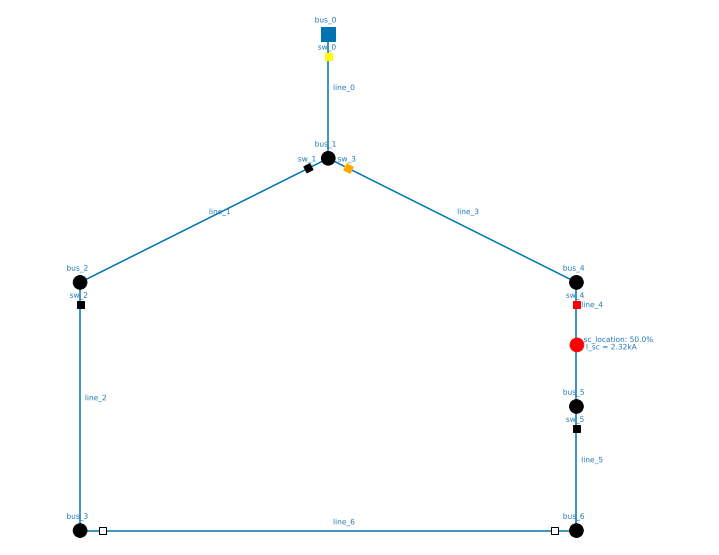

In [6]:
from pandapower.protection.implementation.utility_functions import plot_tripped_grid
plot_tripped_grid(net_sc, trip_decisions,sc_location=0.5,plot_annotations=True)

# Create I-t Plot
* Plot showing relation between current and time by using trip decisions and switch index using function create_I_t_plot from utility function

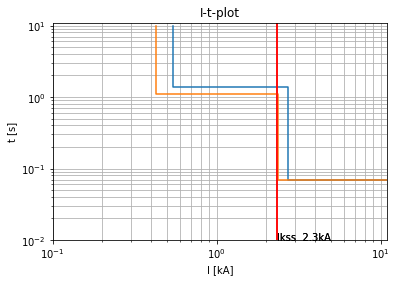

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [7]:
from pandapower.protection.implementation.utility_functions import create_I_t_plot
import matplotlib.pyplot as plt
create_I_t_plot(trip_decisions,switch_id=[0,3])
plt.close()

# Additional features 

### Manual tripping time for each switches
oc_fault_scenario is capable to provide manual tripping time for each switches in the form a dataframe (replace tripping_time_auto by tripping_time_manual)


In [8]:
import pandas as pd
tripping_time_manual= pd.DataFrame({'switch_id': [0,1,2,3,4,5,6],
                              't_gg': [0.07,0.07,0.07,0.07,0.07,0.07,0.06],
                              't_g':[0.5,0.8,1.1,1.4,1.7,2.0,2.3]})


In [9]:
trip_decisions=oc_protection.run_fault_scenario_oc(net, sc_line_id =4,sc_location = 0.5,
                                                   tripping_time_manual=tripping_time_manual)

Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers


   Switch ID Switch type   Trip  Fault Current [kA]  Trip time [s]
0          0          OC   True            2.317906           0.50
1          1          OC  False            0.000000            inf
2          2          OC  False            0.000000            inf
3          3          OC   True            2.317906           1.40
4          4          OC   True            2.317906           0.07
5          5          OC  False            0.000000            inf


### Varying OC parameters
OC fault scenario is capable to set  treshhold triping current for each switches by varying the default values in the following parameters from the default value:

- sc_fraction (float, 0.95) : Maximum possible extent to which the short circuit can be created on the line.
- overload_factor (float, 1.25):Allowable over loading on the line used to calculate the backup pick up current.
- ct_current_factor (float, 1.2): Current mutiplication factor to define the backup pick up current.
- safety_factor (float, 1): Safety limit for the instantaneous pick up currents.


In [10]:
trip_decisions=oc_protection.run_fault_scenario_oc(net, sc_line_id =4,sc_location = 0.5,
                tripping_time_auto=[0.07,0.5,0.3],sc_fraction=0.9, overload_factor=1.5, ct_current_factor=2,safety_factor=1.5)

Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers
Branch results are in beta mode and might not always be reliable, especially for transformers


   Switch ID Switch type   Trip  Fault Current [kA]  Trip time [s]
0          0          OC   True            2.317906            1.4
1          1          OC  False            0.000000            inf
2          2          OC  False            0.000000            inf
3          3          OC   True            2.317906            1.1
4          4          OC   True            2.317906            0.8
5          5          OC  False            0.000000            inf


### Manual tripping current for each switches
Instead of varying the OC parametrs, userd can defne pickup current (instantaneous and backup) for each switches in the form of dataframe.

In [12]:
pickup_current_manual= pd.DataFrame({'switch_id': [0,1,2,3,4,5,6],
                              'Igg': [2.2,2.3,2.1,2.5,1.2,0.9,1.7],
                              'Ig':[0.8,0.7,0.7,0.8,0.8,0.8,0.9]})

trip_decisions=oc_protection.run_fault_scenario_oc(net, sc_line_id =4,sc_location = 0.5,tripping_time_auto=[0.07,0.5,0.3],
                                                   pickup_current_manual=pickup_current_manual)

   Switch ID Switch type   Trip  Fault Current [kA]  Trip time [s]
0          0          OC   True            2.317906           0.07
1          1          OC  False            0.000000            inf
2          2          OC  False            0.000000            inf
3          3          OC   True            2.317906           1.10
4          4          OC   True            2.317906           0.07
5          5          OC  False            0.000000            inf
